<a href="https://colab.research.google.com/github/DasSagor/Machine-Learning/blob/main/Module_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
# Create sample dateset
hours = np.array([2,4,6,8,10]).reshape(-1,1)
marks = np.array([55,60,70,80,88])

hours,marks

(array([[ 2],
        [ 4],
        [ 6],
        [ 8],
        [10]]),
 array([55, 60, 70, 80, 88]))

In [ ]:
# Train a Linear Regression model

model = LinearRegression()
model.fit(hours,marks)


LinearRegression()

In [ ]:
from traceback import print_tb
# View the learned parameters
print('m: ', model.coef_[0])
print('c: ',model.intercept_)


m:  4.3
c:  44.8


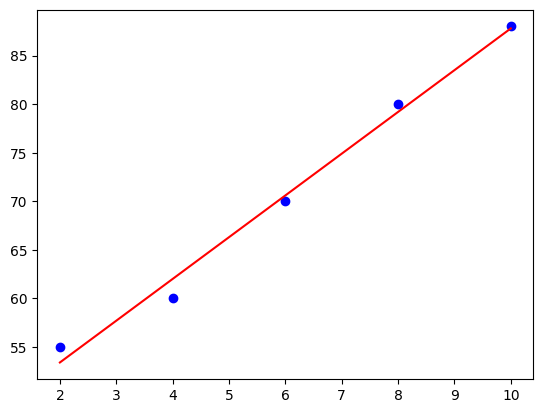

In [ ]:
# Visualize the Best Fit Line
plt.scatter(hours,marks, color='blue', label='Actual Data')
p_m = model.predict(hours)

plt.plot(hours,p_m, color='red', label='Best fit line')



In [ ]:
# Predict marks for new student

n_h = np.array([[7]])
prediction = model.predict(n_h)
print(prediction)

print(model.predict([[3]]))

[74.9]
[57.7]


### Cost Function and Gradient Descent

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Fit a Linear Regression Model (Closed-Form Solver)
lin_reg = LinearRegression()
lin_reg.fit(hours,marks)

print('m: ',lin_reg.coef_[0])
print('c: ',lin_reg.intercept_)

m:  4.3
c:  44.8


In [ ]:
# Compute the Cost (Mean Squared Error) using a Library

pred_marks = lin_reg.predict(hours)
mse_lin = mean_squared_error(marks,pred_marks)

print('MSE for LinearRegression: ',mse_lin)

MSE for LinearRegression:  1.5200000000000033


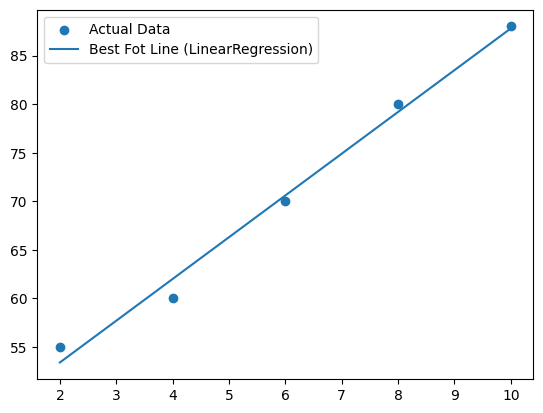

In [ ]:
# Visualize the data and Best Fit Line

plt.scatter(hours,marks,label='Actual Data')
plt.plot(hours,pred_marks,label='Best Fot Line (LinearRegression)')
plt.legend()

In [ ]:
# Use a Gradient-Descent-Based Model - SGDRegressor

sgd_reg = SGDRegressor(
    max_iter=1000,
    learning_rate='invscaling',
    eta0=0.01,
    random_state=42
)

sgd_reg.fit(hours,marks)
print('m: ',sgd_reg.coef_[0])
print('c: ',sgd_reg.intercept_[0])

pred_sgd = sgd_reg.predict(hours)
mse_sgd = mean_squared_error(marks,pred_sgd)

print('MSE of SGDRegression:', mse_sgd)

m:  5.698065492806587
c:  34.475265427340794
MSE of SGDRegression: 20.906115830567398


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


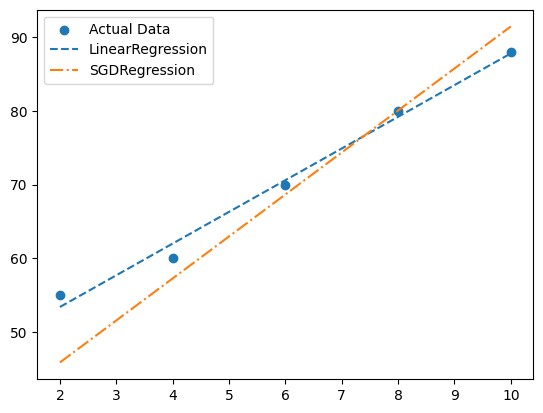

In [ ]:
# Compare Both Lines Visually
plt.scatter(hours,marks,label='Actual Data')
plt.plot(hours,pred_marks,label='LinearRegression',linestyle='--')
plt.plot(hours,pred_sgd,label='SGDRegression',linestyle='-.')
plt.legend()

### Regression Evaluation Metrics (R², MAE, RMSE)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
pred = model.predict(hours)
print(pred)

[53.4 62.  70.6 79.2 87.8]


In [ ]:
# Compute Matrics
mae = mean_absolute_error(marks,pred)
mse = mean_squared_error(marks,pred)
rmse = np.sqrt(mse)
r2 = r2_score(marks,pred)

# Print results
print('MAE: ',mae)
print('MSE: ',mse)
print('RMSE: ',rmse)
print('R^2: ',r2)


MAE:  1.040000000000002
MSE:  1.5200000000000033
RMSE:  1.2328828005937966
R^2:  0.9898286937901499


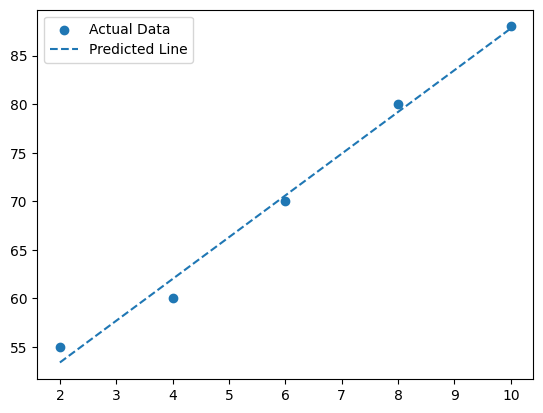

In [ ]:
plt.scatter(hours,marks,label='Actual Data')
plt.plot(hours,pred,label='Predicted Line',linestyle='--')
plt.legend()